# **MCT Program CSE473s: Computational Intelligence Fall 2025** 
# Project Title: Build Your Own Neural Network Library & Advanced Applications

## **Team Members - Team 19**

| ID      | Name                      |
| ------- | ------------------------- |
| 2100543 | Mohamed Montasser         |
| 2100660 | Fatma Samy Ahmed          |
| 2101231 | Moaz Gamal Alsayed        |
| 2100961 | Mohamed Islam Salah Aldin |
| 2100820 | Zeyad Samer Lotfy         |

# Neural Network Library & Advanced Applications - Project Demo

This notebook demonstrates all components of the neural network library project:
1. Gradient Checking (Backpropagation Validation)
2. XOR Problem (Binary Classification)
3. Autoencoder (Image Reconstruction on MNIST)
4. SVM Classification with Autoencoder Features
5. TensorFlow/Keras Comparison

## Part 1: Library Implementation, Initial Test and Validation (XOR Problem) 
### Before tackling complex tasks, you must prove your library works by solving the XOR problem. 
* 1. Task: Build a network that correctly classifies the 4 inputs of the XOR function. 
* 2. Architecture: Use your library to build a simple MLP (e.g., 2-4-1 architecture with Tanh and Sigmoid activations). 
* 3. Training: Train the network using your SGD optimizer and MSE loss. 
* 4. Goal: Demonstrate that your network's predictions are correct for all 4 inputs after training.

## Setup and Imports

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import time

sys.path.append('..')

# Import library components
from lib.layers import Dense
from lib.activations import ReLU, Sigmoid, Tanh, Softmax
from lib.losses import MSE
from lib.optimizer import SGD
from lib.network import Sequential

## Section 1: Gradient Checking (proving your backprop is correct). 

### Library Unit Testing (Gradient Checking): 
* You must include a section in your notebook that proves your backpropagation is correct using numerical gradient checking. 
* The formula is: ∂L/∂W ≈ [L(W + ε) - L(W - ε)]/(2ε) 
* Your analytical gradient must be nearly identical to the numerical gradient.

In [12]:
# hena ben3mel network sade2 3ashan ne-check el gradients (numerical vs backprop)
np.random.seed(42)

# Small input/output for testing
X = np.random.randn(2, 3)  # batch_size=2, input_features=3   # ben-gahhez sample soghayar 3ashan el test
Y_true = np.random.randn(2, 1)  # batch_size=2, output=1      # w hena el targets el mo3adla leha

# Create simple network: 3 -> 4 -> 1
model = Sequential()
model.add(Dense(3, 4))   # first dense layer mn 3 features l 4 neurons
model.add(ReLU())        # ben7ot relu 3ashan non-linearity
model.add(Dense(4, 1))   # output layer neuron wa7ed

print(f"Input shape: {X.shape}")
print(f"Target shape: {Y_true.shape}")
print("Network created for gradient checking")


Input shape: (2, 3)
Target shape: (2, 1)
Network created for gradient checking


In [13]:
# function de 3ashan ne-check el gradient beta3 el backprop b nfsena (numerical gradient checking)
def numerical_gradient_check(model, X, Y_true, layer_idx, param_idx, epsilon=1e-5):
    """
    Compare analytical gradient with numerical gradient
    """
    loss_fn = MSE()
    
    # Forward and backward to get analytical gradient
    Y_pred = model.forward(X)                 # awel 7aga ben3mel forward pass
    loss = loss_fn.forward(Y_true, Y_pred)    # ben7seb el loss 3ala el output
    dL_dY = loss_fn.backward()                # dL/dY mn el loss function
    model.backward(dL_dY)                     # hena el model by7seb el gradients el analytical
    
    # Get analytical gradient
    trainable_layers = model.get_trainable_layers()
    layer = trainable_layers[layer_idx]       # ben-choose layer mo3ayana 3ashan ne-check 3aleha
    analytical_grad = layer.get_grads()[param_idx].copy()  # hena el gradient el tayelna mn el backprop
    
    # Calculate numerical gradient
    params = layer.get_params()[param_idx]    # el parameter el 3ayzeen ne-check gradient beta3o (W aw b)
    original_value = params.copy()
    numerical_grad = np.zeros_like(params)
    
    for i in range(params.shape[0]):
        for j in range(params.shape[1]):
            # f(w + epsilon)
            params[i, j] = original_value[i, j] + epsilon   # bnzawed epsilon soghayara 3ala el param
            Y_pred_plus = model.forward(X)
            loss_plus = loss_fn.forward(Y_true, Y_pred_plus)
            
            # f(w - epsilon)
            params[i, j] = original_value[i, j] - epsilon   # w hena bn-na2es epsilon
            Y_pred_minus = model.forward(X)
            loss_minus = loss_fn.forward(Y_true, Y_pred_minus)
            
            # Restore original value
            params[i, j] = original_value[i, j]             # raga3na el param le aslo 3ashan ma nbooz el model
            
            # Numerical gradient
            numerical_grad[i, j] = (loss_plus - loss_minus) / (2 * epsilon)  # formula beta3 numerical gradient
    
    return analytical_grad, numerical_grad

print("Gradient checking function defined")


Gradient checking function defined


In [14]:
print("=== GRADIENT CHECKING ===")
print("Comparing analytical gradients (from backprop) with numerical gradients...")
# Check first layer weights
analytical, numerical = numerical_gradient_check(model, X, Y_true, layer_idx=0, param_idx=0, epsilon=1e-5)


=== GRADIENT CHECKING ===
Comparing analytical gradients (from backprop) with numerical gradients...


In [15]:
# hena ben-compare ma ben el analytical gradient w el numerical 3ashan nshoof el backprop mazboot wala la2
diff = np.abs(analytical - numerical)
rel_error = np.mean(diff) / (np.mean(np.abs(analytical)) + np.mean(np.abs(numerical)) + 1e-8)

print(f"Analytical gradient (first 3 values): {analytical.flatten()[:3]}")
print(f"Numerical gradient (first 3 values):  {numerical.flatten()[:3]}")
print(f"Mean absolute difference: {np.mean(diff):.2e}")
print(f"Relative error: {rel_error:.2e}")

if rel_error < 1e-4: # law el error soghayar keda el implementation beta3na kwayes
    print("GRADIENT CHECK PASSED! Backpropagation is correct!")
else:  # law tal3 kbeer n3raf en feh moshkela fl derivatives
    print("WARNING: Large gradient difference detected")

Analytical gradient (first 3 values): [0.        0.3575134 0.       ]
Numerical gradient (first 3 values):  [0.        0.3575134 0.       ]
Mean absolute difference: 1.87e-12
Relative error: 1.97e-11
GRADIENT CHECK PASSED! Backpropagation is correct!


================================================================================================================

## Section 2: The XOR problem (training and results) using your library. 

The XOR problem is a classic test for neural networks. A network must learn to distinguish:
- (0,0) → 0
- (0,1) → 1
- (1,0) → 1
- (1,1) → 0

In [19]:
# XOR dataset
X_xor = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]])

Y_xor = np.array([[0],
                  [1],
                  [1],
                  [0]])

print("XOR Dataset:")
print("Inputs:\n", X_xor)
print("Targets:\n", Y_xor)
print()


XOR Dataset:
Inputs:
 [[0 0]
 [0 1]
 [1 0]
 [1 1]]
Targets:
 [[0]
 [1]
 [1]
 [0]]



In [20]:
# Build XOR network
np.random.seed(42)

xor_model = Sequential()
xor_model.add(Dense(2, 4))  # Hidden layer with 4 neurons t3allem el non-linearity beta3t el xor
xor_model.add(Tanh())        # Tanh 3ashan el hidden layer activation
xor_model.add(Dense(4, 1))   # Output layer neuron wa7ed 3ashan el xor binary
xor_model.add(Sigmoid())     # Sigmoid for binary output yeb2a probability ben 0 w 1

print("XOR Network Architecture:")
print("Input (2) -> Dense (4) -> Tanh -> Dense (1) -> Sigmoid")

XOR Network Architecture:
Input (2) -> Dense (4) -> Tanh -> Dense (1) -> Sigmoid


In [21]:
# hena bentrain el xor model b MSE loss w SGD optimizer w bn-track el loss w el training time 3ashan nshoof el performance
loss_fn = MSE()
optimizer = SGD(learning_rate=0.5)

num_epochs = 1000
losses = []

print(f"Training for {num_epochs} epochs...")

start_time = time.time()   # start timer

for epoch in range(num_epochs):
    # step wa7da: forward + backward + update
    epoch_loss = xor_model.train_step(X_xor, Y_xor, loss_fn, optimizer)
    losses.append(epoch_loss)
    
    if (epoch + 1) % 200 == 0:
        # ben-print el loss kol shwaya 3ashan nt2aked enoh by2al
        print(f"Epoch {epoch + 1}/{num_epochs} - Loss: {epoch_loss:.6f}")

end_time = time.time()     # end timer
training_time = end_time - start_time

print(f"Final Loss: {losses[-1]:.6f}")
print(f"Training Time: {training_time:.4f} seconds")

Training for 1000 epochs...
Epoch 200/1000 - Loss: 0.083043
Epoch 400/1000 - Loss: 0.011267
Epoch 600/1000 - Loss: 0.004854
Epoch 800/1000 - Loss: 0.002970
Epoch 1000/1000 - Loss: 0.002108
Final Loss: 0.002108
Training Time: 0.0800 seconds


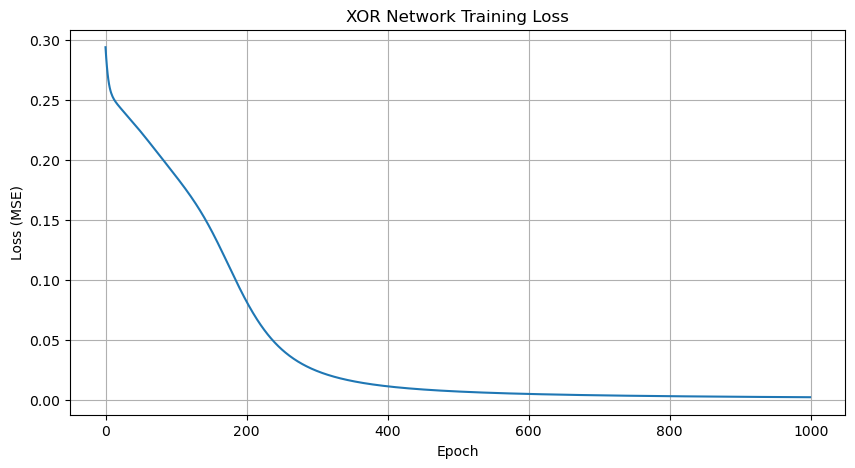

In [22]:
# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('XOR Network Training Loss')
plt.grid(True)
plt.show()

In [23]:
# Test XOR predictions
print("=== XOR PREDICTIONS ===")
Y_pred_xor = xor_model.predict(X_xor)

print("Input | Target | Prediction | Rounded")
print("-" * 45)

for i in range(len(X_xor)):
    inp = X_xor[i]
    target = Y_xor[i][0]
    pred = Y_pred_xor[i][0]
    rounded = round(pred)
    correct = "✓" if rounded == target else "✗"
    print(f"{inp} | {target:.1f} | {pred:.4f} | {rounded} {correct}")

# Calculate accuracy
correct_count = np.sum(np.round(Y_pred_xor) == Y_xor)
accuracy = correct_count / len(Y_xor) * 100
print(f"Accuracy: {accuracy:.1f}%")

=== XOR PREDICTIONS ===
Input | Target | Prediction | Rounded
---------------------------------------------
[0 0] | 0.0 | 0.0222 | 0 ✓
[0 1] | 1.0 | 0.9537 | 1 ✓
[1 0] | 1.0 | 0.9516 | 1 ✓
[1 1] | 0.0 | 0.0586 | 0 ✓
Accuracy: 100.0%


=============================================================================================================

=============================================================================================================

# Part 2: Autoencoder & Latent Space Classification 
* Task: Implement an autoencoder for MNIST image reconstruction and use the encoder for digit classification. 

## Section 3: Autoencoder - MNIST Image Reconstruction
* Build an autoencoder to compress and reconstruct MNIST digits using our library.

In [28]:
# Load MNIST data
from tensorflow.keras.datasets import mnist

print("Loading MNIST data...")
(X_train_full, Y_train_labels), (X_test_full, Y_test_labels) = mnist.load_data()

# Flatten and normalize
X_train_full = X_train_full.reshape(-1, 784).astype(np.float32) / 255.0
X_test_full = X_test_full.reshape(-1, 784).astype(np.float32) / 255.0

# Use subset for faster training
X_train = X_train_full[:5000]  # 5000 training samples
X_test = X_test_full[:1000]    # 1000 test samples

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Loading MNIST data...
Training data shape: (5000, 784)
Test data shape: (1000, 784)


In [29]:
# Build autoencoder
# Encoder: 784 -> 256 -> 64 (latent space)
# Decoder: 64 -> 256 -> 784

np.random.seed(42)

autoencoder = Sequential()

# Encoder
autoencoder.add(Dense(784, 256))  # 784 pixels to 256 features
autoencoder.add(ReLU())
autoencoder.add(Dense(256, 64))   # 256 to 64 (latent space)
autoencoder.add(ReLU())

# Decoder
autoencoder.add(Dense(64, 256))   # 64 back to 256
autoencoder.add(ReLU())
autoencoder.add(Dense(256, 784))  # 256 back to 784 pixels
autoencoder.add(Sigmoid())        # Sigmoid to keep output [0,1]

print("Autoencoder Architecture:")
print("784 -> Dense(256) -> ReLU -> Dense(64) -> ReLU -> Dense(256) -> ReLU -> Dense(784) -> Sigmoid")

Autoencoder Architecture:
784 -> Dense(256) -> ReLU -> Dense(64) -> ReLU -> Dense(256) -> ReLU -> Dense(784) -> Sigmoid


In [30]:
# Train autoencoder
print("Training autoencoder (this may take a minute)...")

loss_fn_ae = MSE()
optimizer_ae = SGD(learning_rate=0.01)

num_epochs_ae = 50
batch_size = 256
ae_losses = []

for epoch in range(num_epochs_ae):
    # Shuffle data
    indices = np.random.permutation(len(X_train))
    X_train_shuffled = X_train[indices]
    
    epoch_loss = 0
    num_batches = len(X_train) // batch_size
    
    for batch_idx in range(num_batches):
        start_idx = batch_idx * batch_size
        end_idx = start_idx + batch_size
        X_batch = X_train_shuffled[start_idx:end_idx]
        
        # For autoencoder, target = input
        batch_loss = autoencoder.train_step(X_batch, X_batch, loss_fn_ae, optimizer_ae)
        epoch_loss += batch_loss
    
    epoch_loss /= num_batches
    ae_losses.append(epoch_loss)
    
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch + 1}/{num_epochs_ae} - Loss: {epoch_loss:.6f}")

print(f"Final Autoencoder Loss: {ae_losses[-1]:.6f}")

Training autoencoder (this may take a minute)...
Epoch 10/50 - Loss: 0.043821
Epoch 20/50 - Loss: 0.032658
Epoch 30/50 - Loss: 0.027760
Epoch 40/50 - Loss: 0.022809
Epoch 50/50 - Loss: 0.020686
Final Autoencoder Loss: 0.020686


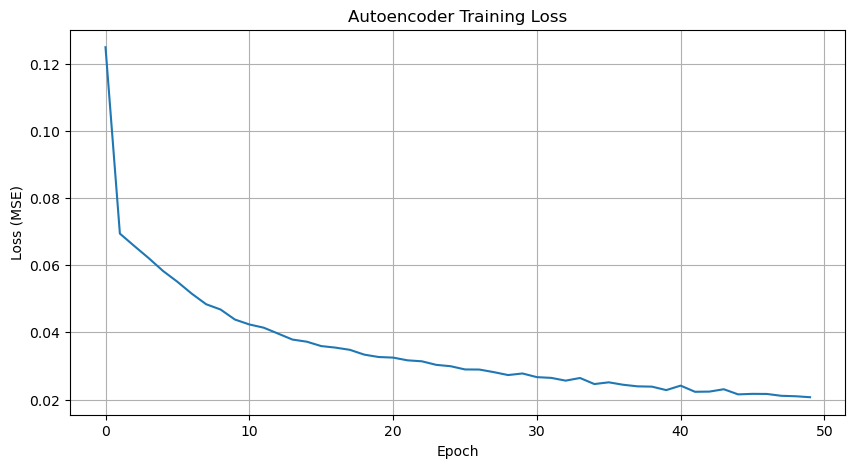

In [31]:
# Plot autoencoder loss
plt.figure(figsize=(10, 5))
plt.plot(ae_losses)
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Autoencoder Training Loss')
plt.grid(True)
plt.show()

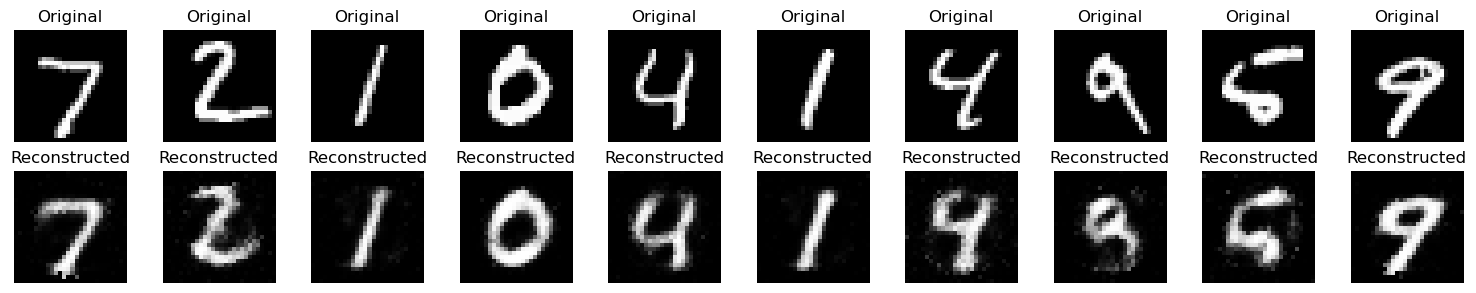

Mean Reconstruction Error: 0.021257


In [32]:
# Visualize reconstructions
X_test_recon = autoencoder.predict(X_test)

# Show original vs reconstructed
num_show = 10
fig, axes = plt.subplots(2, num_show, figsize=(15, 3))

for i in range(num_show):
    # Original
    axes[0, i].imshow(X_test[i].reshape(28, 28), cmap='gray')
    axes[0, i].set_title('Original')
    axes[0, i].axis('off')
    
    # Reconstructed
    axes[1, i].imshow(X_test_recon[i].reshape(28, 28), cmap='gray')
    axes[1, i].set_title('Reconstructed')
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()

# Calculate reconstruction error
recon_error = np.mean((X_test - X_test_recon) ** 2)
print(f"Mean Reconstruction Error: {recon_error:.6f}")

# Section 4: SVM Classification with Autoencoder Features

Extract features from the autoencoder's latent space and train an SVM classifier.

In [34]:
# Extract encoder from autoencoder
# Encoder consists of first 3 layers

encoder = Sequential()
encoder.add(autoencoder.layers[0])  # Dense 784->256
encoder.add(autoencoder.layers[1])  # ReLU
encoder.add(autoencoder.layers[2])  # Dense 256->64
encoder.add(autoencoder.layers[3])  # ReLU

print("Encoder Architecture:")
print("784 -> Dense(256) -> ReLU -> Dense(64) -> ReLU")
print("(64-dimensional latent space)")

Encoder Architecture:
784 -> Dense(256) -> ReLU -> Dense(64) -> ReLU
(64-dimensional latent space)


In [35]:
# Extract latent features
print("Extracting latent features from training data...")
X_train_latent = encoder.predict(X_train_full)

print("Extracting latent features from test data...")
X_test_latent = encoder.predict(X_test_full)

print(f"Latent training features shape: {X_train_latent.shape}")
print(f"Latent test features shape: {X_test_latent.shape}")
print(f"Labels shape: {Y_train_labels.shape}")

Extracting latent features from training data...
Extracting latent features from test data...
Latent training features shape: (60000, 64)
Latent test features shape: (10000, 64)
Labels shape: (60000,)


In [36]:
# Train SVM on latent features
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Training SVM classifier on latent features...")
svm_model = SVC(kernel='rbf', C=10)
svm_model.fit(X_train_latent, Y_train_labels)

print("SVM training complete!")

Training SVM classifier on latent features...
SVM training complete!


In [37]:
# Make predictions
Y_pred_train = svm_model.predict(X_train_latent)
Y_pred_test = svm_model.predict(X_test_latent)

# Calculate accuracy
train_accuracy = accuracy_score(Y_train_labels, Y_pred_train)
test_accuracy = accuracy_score(Y_test_labels, Y_pred_test)

print(f"SVM Results:")
print(f"Training Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

SVM Results:
Training Accuracy: 0.9890 (98.90%)
Test Accuracy: 0.9765 (97.65%)


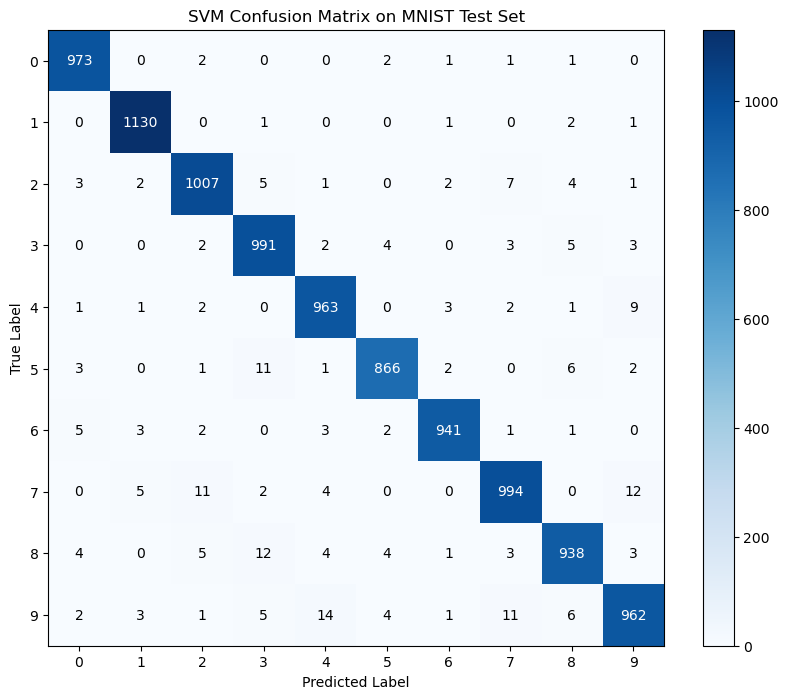

In [38]:
# Confusion matrix
cm = confusion_matrix(Y_test_labels, Y_pred_test)

plt.figure(figsize=(10, 8))
plt.imshow(cm, cmap='Blues')
plt.colorbar()

# Fix tick labels
plt.xticks(ticks=range(10), labels=range(0, 10))
plt.yticks(ticks=range(10), labels=range(0, 10))

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('SVM Confusion Matrix on MNIST Test Set')

for i in range(10):
    for j in range(10):
        plt.text(j, i, str(cm[i, j]),
                 ha='center', va='center',
                 color='white' if cm[i, j] > cm.max()/2 else 'black')

plt.show()


In [59]:
# Classification report
print("=== CLASSIFICATION METRICS ===")
print(classification_report(Y_test_labels, Y_pred_test, digits=4))

=== CLASSIFICATION METRICS ===
              precision    recall  f1-score   support

           0     0.9818    0.9929    0.9873       980
           1     0.9878    0.9956    0.9917      1135
           2     0.9748    0.9758    0.9753      1032
           3     0.9649    0.9812    0.9730      1010
           4     0.9708    0.9807    0.9757       982
           5     0.9819    0.9709    0.9763       892
           6     0.9884    0.9823    0.9853       958
           7     0.9726    0.9669    0.9698      1028
           8     0.9730    0.9630    0.9680       974
           9     0.9688    0.9534    0.9610      1009

    accuracy                         0.9765     10000
   macro avg     0.9765    0.9763    0.9763     10000
weighted avg     0.9765    0.9765    0.9765     10000



# Section 5: TensorFlow/Keras Comparison

Implement the same architectures in TensorFlow and compare.

In [62]:
import tensorflow as tf
from tensorflow.keras import layers, models
import time

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.18.0


In [64]:
# Build TensorFlow XOR model
print("=== TENSORFLOW XOR MODEL ===")

tf_xor_model = models.Sequential([
    layers.Dense(4, activation='tanh', input_shape=(2,)),
    layers.Dense(1, activation='sigmoid')
])

tf_xor_model.compile(optimizer='sgd', loss='mse')

print("TensorFlow XOR Model Architecture:")
tf_xor_model.summary()

=== TENSORFLOW XOR MODEL ===
TensorFlow XOR Model Architecture:


D:\apps\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17 (68.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 0 (0.00 B)

In [66]:
# Train TensorFlow XOR model
print("Training TensorFlow XOR model...")
start_time = time.time()

tf_xor_history = tf_xor_model.fit(
    X_xor, Y_xor,
    epochs=1000,
    verbose=0,
    batch_size=4
)

tf_xor_time = time.time() - start_time
print(f"Training time: {tf_xor_time:.3f} seconds")

Training TensorFlow XOR model...
Training time: 40.938 seconds


In [68]:
# Compare XOR results
print("=== XOR MODEL COMPARISON ===")

tf_xor_pred = tf_xor_model.predict(X_xor)
our_xor_pred = Y_pred_xor

print("Input | Target | Our Lib | TF/Keras")
print("-" * 45)

for i in range(len(X_xor)):
    inp = X_xor[i]
    target = Y_xor[i][0]
    our_pred = our_xor_pred[i][0]
    tf_pred = tf_xor_pred[i][0]
    print(f"{inp} | {target:.1f} | {our_pred:.4f} | {tf_pred:.4f}")

# Loss comparison
our_xor_loss = losses[-1]
tf_xor_loss = tf_xor_history.history['loss'][-1]

print(f"Final Loss (Our Library): {our_xor_loss:.6f}")
print(f"Final Loss (TensorFlow): {tf_xor_loss:.6f}")

=== XOR MODEL COMPARISON ===
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Input | Target | Our Lib | TF/Keras
---------------------------------------------
[0 0] | 0.0 | 0.0222 | 0.4696
[0 1] | 1.0 | 0.9537 | 0.3402
[1 0] | 1.0 | 0.9516 | 0.6441
[1 1] | 0.0 | 0.0586 | 0.3886
Final Loss (Our Library): 0.002108
Final Loss (TensorFlow): 0.233407


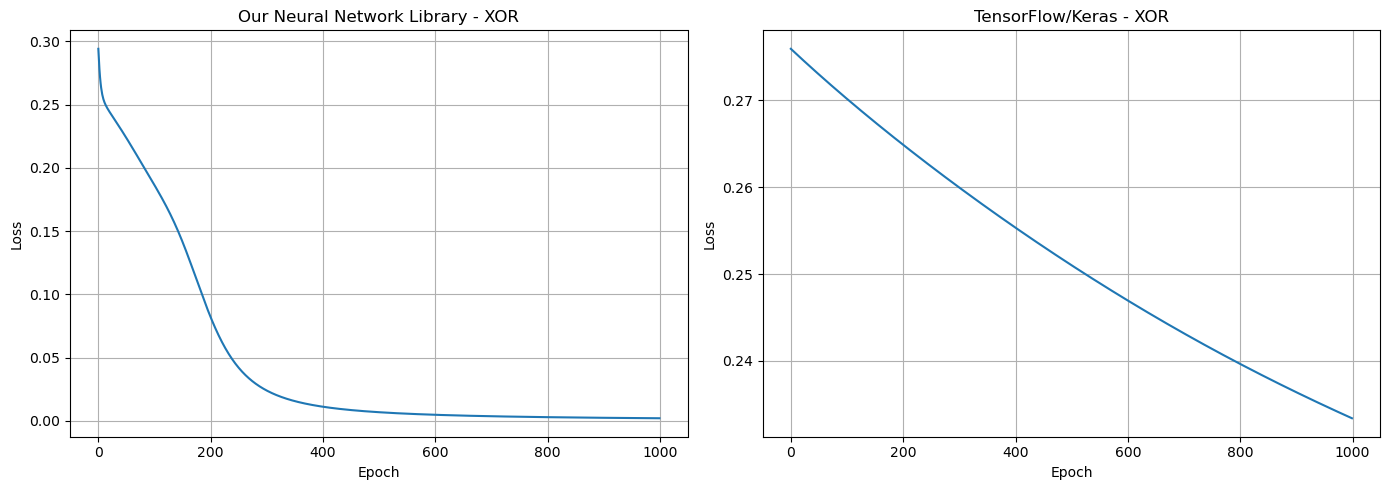

In [70]:
# Plot loss comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Our library
axes[0].plot(losses)
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('Our Neural Network Library - XOR')
axes[0].grid(True)

# TensorFlow
axes[1].plot(tf_xor_history.history['loss'])
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].set_title('TensorFlow/Keras - XOR')
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [72]:
# Build TensorFlow Autoencoder
print("=== TENSORFLOW AUTOENCODER ===")

tf_autoencoder = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),  # latent space
    layers.Dense(256, activation='relu'),
    layers.Dense(784, activation='sigmoid')
])

tf_autoencoder.compile(optimizer='adam', loss='mse')

print("TensorFlow Autoencoder Architecture:")
tf_autoencoder.summary()

=== TENSORFLOW AUTOENCODER ===
TensorFlow Autoencoder Architecture:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 784)            │       201,488 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 435,536 (1.66 MB)

 Trainable params: 435,536 (1.66 MB)

 Non-trainable params: 0 (0.00 B)

In [74]:
# Train TensorFlow Autoencoder
print("Training TensorFlow Autoencoder...")
start_time = time.time()

tf_ae_history = tf_autoencoder.fit(
    X_train, X_train,
    epochs=50,
    batch_size=256,
    validation_data=(X_test, X_test),
    verbose=0
)

tf_ae_time = time.time() - start_time
print(f"Training time: {tf_ae_time:.3f} seconds")

Training TensorFlow Autoencoder...
Training time: 11.420 seconds


In [76]:
# Compare Autoencoder results
print("=== AUTOENCODER COMPARISON ===")

our_ae_final_loss = ae_losses[-1]
tf_ae_final_loss = tf_ae_history.history['loss'][-1]

print(f"Final Reconstruction Loss (Our Library): {our_ae_final_loss:.6f}")
print(f"Final Reconstruction Loss (TensorFlow): {tf_ae_final_loss:.6f}")
print(f"Training Time (Our Library): {training_time:.3f} seconds")
print(f"Training Time (TensorFlow): {tf_ae_time:.3f} seconds")

=== AUTOENCODER COMPARISON ===
Final Reconstruction Loss (Our Library): 0.020686
Final Reconstruction Loss (TensorFlow): 0.009282
Training Time (Our Library): 0.080 seconds
Training Time (TensorFlow): 11.420 seconds


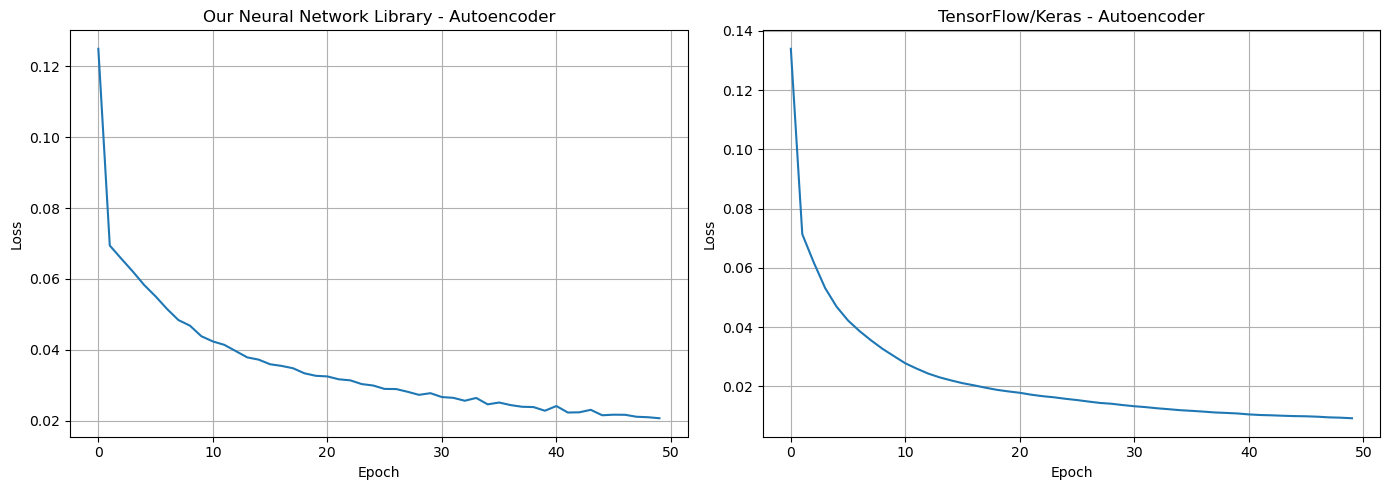

In [78]:
# Plot autoencoder loss comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Our library
axes[0].plot(ae_losses)
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('Our Neural Network Library - Autoencoder')
axes[0].grid(True)

# TensorFlow
axes[1].plot(tf_ae_history.history['loss'])
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].set_title('TensorFlow/Keras - Autoencoder')
axes[1].grid(True)

plt.tight_layout()
plt.show()